In [21]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt

# Ejercicios 


1.  Encontrar la formulación  variacional de 

$$\begin{cases}-\nabla\cdot(\alpha\nabla u(x))=f(x), &\text{ con }x\in\Omega\\
u(x)=U_a,&\text{ con }x\in\Gamma_{D_a}\\
u(x)=U_b,&\text{ con }x\in\Gamma_{D_b}\\
\frac{\partial u}{\partial n}=0,&\text{ con }x\in\Gamma_{N}\end{cases}$$
 

**R/** Dado que se tienen condiciones de Dirichlet no homogeneas, defina:
 $$V = \{ v \in H^1(\Omega): v|_{\Gamma_{D_a}}=U_a, v|_{\Gamma_{D_b}}=U_b \}$$
 y 
$$ \hat{V} = \{ v \in H^1_0(\Omega): v|_{\Gamma_{D_a}}=0, v|_{\Gamma_{D_b}}=0 \}$$

Sea $u \in V$ y $v \in \hat{V}$, integrando sobre $\Omega$:
$$- \int_{\Omega} v \Big( \nabla\cdot(\alpha\nabla u(x)) \Big) \, dx = \int_{\Omega} fv \, dx$$
Usando teorema de Green se obtiene que:
$$- \int_{\Omega} v \Big( \nabla\cdot(\alpha\nabla u(x)) \Big) \, dx = \int_{\Omega} \alpha \nabla u \cdot \nabla v \, dx - \int_{\partial \Omega} \alpha \frac{\partial u}{\partial \eta} v \, dS$$
Pero:
$$ - \int_{\partial \Omega} \alpha \frac{\partial u}{\partial \eta} v \, dS = - \Big( \int_{\Gamma_{D_a}} \alpha \frac{\partial u}{\partial \eta} v \, dS + \int_{\Gamma_{D_b}} \alpha \frac{\partial u}{\partial \eta} v \, dS + \int_{\Gamma_{N}} \alpha \frac{\partial u}{\partial \eta} v \, dS \Big) $$
Dado que $\frac{\partial u}{\partial \eta}=0, \text{ con }x\in\Gamma_{N}$ el ultimo termino se anula. Ademas, $v = 0$ en $\Gamma_{D_a}$ y $\Gamma_{D_b}$, entonces:
$$ - \int_{\Omega} v \Big( \nabla\cdot(\alpha\nabla u(x)) \Big) \, dx = \int_{\Omega} \alpha \nabla u \cdot \nabla v \, dx $$ 
Finalmente, se tiene que la forma variacional esta dada por:
$$ \int_{\Omega} \alpha \nabla u \cdot \nabla v \, dx = \int_{\Omega} f v \, dx $$

2. Encontrar la formulación  variacional de
$$\begin{cases}-\nabla\cdot(\alpha(u)\nabla u(x))=f(x), &\text{ con }x\in\Omega\\
u(x)=g,&\text{ con }x\in\partial\Omega\end{cases}$$

**R/** Defina
 $$V = \{ v \in H^1(\Omega): v|_{\partial \Omega}= g \}$$
 y
 $$ \hat{V} = \{ v \in H^1_0(\Omega): v|_{\partial \Omega}= 0 \}$$
Sea $u \in V$ y $v \in \hat{V}$, integrando sobre $\Omega$:
$$ - \int_{\Omega} \Big( \nabla \cdot (\alpha(u)\nabla u(x)) \Big) v \, dx = \int_{\Omega} f v \, dx $$
Usando teorema de Green se obtiene que:
$$- \int_{\Omega} \Big( \nabla \cdot (\alpha(u)\nabla u(x)) \Big) v \, dx = \int_{\Omega} \alpha(u) \nabla u \cdot \nabla v \, dx - \int_{\partial \Omega} \alpha(u) \frac{\partial u}{\partial \eta} v \, dS$$
como $v$ se anula $\partial \Omega$ el segundo termino de la derecha es 0, por lo tanto la formula variacional esta dada por:
$$ \int_{\Omega} \alpha(u) \nabla u \cdot \nabla v \, dx =  \int_{\Omega} f v \, dx$$

3. Sea $\Omega=[0,1]\times[0,1]$ y $f(x,y)=x^2+y^2$. Suponiendo que
$$\Gamma_{D_a}=\{(x,y)\in\Omega:x=0\},\quad \Gamma_{D_b}=\{(x,y)\in\Omega:x=1\},$$
$$\quad \Gamma_{N}=\{(x,y)\in\Omega:y=0\}\cup\{(x,y)\in\Omega:y=1\}$$
y $U_a=1$, $U_b=1$, $\alpha=5$, Implementar la aproximación del problema 1  en Fenics y resolverlo con el método de Galerkin. Graficar la solución.

In [22]:
# Create mesh
nx = ny = 10
mesh = UnitSquareMesh(nx, ny)

# Define function space
V = FunctionSpace(mesh, 'Lagrange', 2)

# Define functions for boundary conditions
u_a = Constant(1.0)
u_b = Constant(1.0)
g = Constant(0.0)

# Define boundary subdomains
def boundary_Da(x, on_boundary):
    return on_boundary and near(x[0], 0.0)

def boundary_Db(x, on_boundary):
    return on_boundary and near(x[0], 1.0)

def boundary_N(x, on_boundary):
    return on_boundary and (near(x[1], 0.0) or near(x[1], 1.0))

bc_a = DirichletBC(V, u_a, boundary_Da)
bc_b = DirichletBC(V, u_b, boundary_Db)
bc_n = DirichletBC(V, g, boundary_N)
bcs = [bc_a, bc_b, bc_n]

Solving linear variational problem.


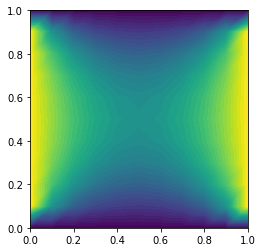

In [23]:
# Define variational problem
alpha = Constant(5.0)
u = TrialFunction(V)
v = TestFunction(V)
a = alpha*inner(nabla_grad(u), nabla_grad(v))*dx
f = Expression('x[0]*x[0] + x[1]*x[1]', degree=2)
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bcs)

# Plot solution
plot(u)
#plot(mesh)

In [24]:
# Verification
Ve = FunctionSpace(mesh, 'Lagrange', 3)
u_e = interpolate(u_b, Ve)
error = (u-u_e)**2*dx
E = sqrt(assemble(error))
print('Error =', E)

Error = 0.5568510184015834


4. Sea $\Omega=[0,1]\times[0,1]$ y $f(x,y)=x^2+y^2$ y $\alpha(u)=u+3$. Implementar la aproximación del problema 2  en Fenics y resolverlo con el método de Galerkin. Graficar la solución. Tomemos $g(x,y) = 0$

Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Object cannot be plotted directly, projecting to piecewise linears.


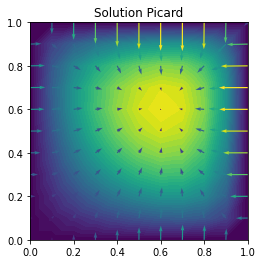

In [25]:
# Define mesh and function space
nx = ny = 10
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'Lagrange', 2)

# Define boundary condition
g = Constant(0.0)
bc = DirichletBC(V, g, 'on_boundary')

# Define parameters
def alpha_(u):
    return u + 3
f = Expression('x[0]*x[0] + x[1]*x[1]', degree=2)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
u_k = interpolate(Constant(0.0),V)
a = alpha_(u_k)*inner(grad(u), grad(v))*dx
L = f*v*dx

# Picard iteration
u = Function(V)
eps = 1
tol = 1.0E-5
iter = 0
maxiter = 25
while eps > tol and iter < maxiter:
    iter += 1
    solve(a == L, u, bc)
    eps = errornorm(u_k, u, norm_type='L2', degree_rise=3)
    u_k.assign(u)

plot(u)
plot(grad(u), title="Solution Picard")

In [26]:
# Verification
u_e = interpolate(g, V)
error = (u-u_e)**2*dx
E = sqrt(assemble(error))
print('Error =', E)

Error = 0.00842585299273892


5. Sea le siguiente problema de valor inicial
$$\begin{cases} \frac{\partial u}{\partial t} = \frac{\partial^2}{\partial x^2} u,\quad &\text{ en } \Omega = [0,\pi]\times(0,T]\\\frac{\partial u}{\partial n}(0)=1,\\ u(\pi,t)=0,\\ u(x,0)=\sin(x),\end{cases}$$ 

 a. Encontrar la formula variacional del problema.

 b. Implementar la aproximación del problema en Fenics y resolverlo con el método de Galerkin. Graficar la solución.

**R/** Note que podemos reescribir la EDP como:
$$ \frac{\partial u}{\partial t} = \Delta u + f$$
con $f = 0$. Sea $\Omega = [0,\pi]\times(0,T]$, defina los espacios:
$$ V \subset L^2(\Omega) = \{ v(\cdot, t) \in H^1([0,\pi]) : v(\pi,t) = 0, \frac{\partial v}{\partial \eta}(0,t) = 1 \} \cap \{ v(x, \cdot) \in H^1((0,T]) : v(x,0) = \sin x \}$$ 
y
$$ \hat{V} \subset L^2(\Omega) = \{ v \in H^1_0([0,\pi]): v(0,t) = v(\pi, t) = 0 \}$$
Para resolver esta EDP dependiente del tiempo, discretizaremos la derivada temporal mediante una aproximacion por diferencias finitas, generando formulas variacionales para cada estado del problema. Recordemos que:
$$ \frac{\partial u^k}{\partial t} \approx \frac{u^k - u^{k-1}}{dt} $$
Por lo tanto una discretizacion del problema seria la siguiente:
$$ \frac{u^k - u^{k-1}}{dt} = \Delta u^k + f^k $$
$$ u^k - u^{k-1} = dt (\Delta u^k + f^k) $$
Sea $u^k \in V$ y $v \in \hat{V}$, integrando sobre $\Omega$:
$$ \int_{\Omega} (u^k - u^{k-1}) v \,dx = dt \Big( \int_{\Omega} (\Delta u^k + f^k ) v \,dx \Big)$$
$$ \int_{\Omega} (u^k - u^{k-1}) v \,dx = dt \int_{\Omega} \Delta u^k v \,dx + dt \int_{\Omega} f^k v \,dx$$
Aplicando teorema de Green al primer termino del lado derecho obtenemos que:
$$ \int_{\Omega}  \Delta u^k v \,dx = \int_{\partial \Omega} \frac{\partial u^k}{\partial \eta} v \, dS - \int_{\Omega} \nabla u^k \nabla v \,dx $$
Pero:
$$ \int_{\partial \Omega} \frac{\partial u^k}{\partial \eta} v \, dS = \int_{\Gamma_D} \frac{\partial u^k}{\partial \eta} v \, dS + \int_{\Gamma_N} \frac{\partial u^k}{\partial \eta} v \, dS $$
Como $v$ se anula en la frontera espacial $\Gamma_D$ (es decir, $v(0,t)=v(\pi,t)=0$), el primer termino es 0.  Entonces, aplicando las condiciones de Neumann se obtiene que:
$$ \int_{\partial \Omega} \frac{\partial u^k}{\partial \eta} v \, dS = \int_{\Gamma_N} v \, dS $$
y:
$$ \int_{\Omega}  \Delta u^k v \,dx = \int_{\Gamma_N} v \, dS - \int_{\Omega} \nabla u^k \nabla v \,dx $$
Finalmente, la formula variacional esta dada por:
$$ \int_{\Omega} (u^k - u^{k-1}) v \,dx = dt \int_{\Gamma_N} v \, dS - dt \int_{\Omega} \nabla u^k \nabla v \,dx + dt \int_{\Omega} f^k v \,dx$$
$$ \int_{\Omega} u^k v \,dx - \int_{\Omega} u^{k-1} v \,dx = dt \int_{\Gamma_N} v \, dS - dt \int_{\Omega} \nabla u^k \cdot \nabla v \,dx + dt \int_{\Omega} f^k v \,dx$$
$$ \int_{\Omega} u^k v \,dx + dt \int_{\Omega} \nabla u^k \cdot \nabla v \,dx = \int_{\Omega} u^{k-1} v \,dx + dt \int_{\Omega} f^k v \,dx + dt \int_{\Gamma_N} v \, dS$$
$$ \int_{\Omega} \Big( u^kv + dt(\nabla u^k \cdot \nabla v) \Big)\, dx =  \int_{\Omega} (u^{k-1} + dt f) v \, dx + dt \int_{\Gamma_N} v \, dS $$


/home/suribe06/mambaforge/envs/fenicsmshr/lib/python3.8/site-packages/dolfin/common/plotting.py:152: UserWarning: The following kwargs were not used by contour: 'label'
  return ax.tricontourf(mesh2triang(mesh), C, levels, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'initial condition, u(t=0, x) = sin(x)')

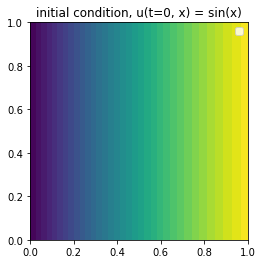

In [27]:
#Discretization
T = 5.0 # final time
num_steps = 50 # number of time steps
dt = T / num_steps # time step size

# Define mesh and function space
nx = ny = 10
#mesh = IntervalMesh(200, 0, np.pi)
mesh = UnitSquareMesh(nx, ny)

V = FunctionSpace(mesh, 'Lagrange', 1)

## Define the boundary condition
u_0 = Constant(0.0)
g = Constant(1.0) #Neumman condition
bc = DirichletBC(V, u_0, "near(x[0], 0)")

def boundary_N(x, on_boundary):
    return on_boundary and near(x[0], 0)

def boundary_D(x, on_boundary):
    return on_boundary and near(x[0], pi)

bc = [DirichletBC(V, Constant(0.0), boundary_D),
      DirichletBC(V, Constant(1.0), boundary_N)]

# Define the initial condition, u(t=0, x) = sin(x)
initial_condition = Expression("sin(x[0])", degree=1)
u_k_old = interpolate(initial_condition, V)
plt.figure()
plot(u_k_old, label="t=0.0")
plt.legend()
plt.title('initial condition, u(t=0, x) = sin(x)')

Solving linear variational problem.
  *** Warning: Found no facets matching domain for boundary condition.
time = 0.10: error = 1
Solving linear variational problem.
  *** Warning: Found no facets matching domain for boundary condition.
time = 0.20: error = 0.331
Solving linear variational problem.
  *** Warning: Found no facets matching domain for boundary condition.
time = 0.30: error = 0.283
Solving linear variational problem.
  *** Warning: Found no facets matching domain for boundary condition.
time = 0.40: error = 0.237
Solving linear variational problem.
  *** Warning: Found no facets matching domain for boundary condition.
time = 0.50: error = 0.194
Solving linear variational problem.
  *** Warning: Found no facets matching domain for boundary condition.
time = 0.60: error = 0.156
Solving linear variational problem.
  *** Warning: Found no facets matching domain for boundary condition.
time = 0.70: error = 0.126
Solving linear variational problem.
  *** Warning: Found no facets

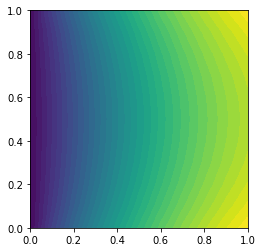

In [28]:
# Define the variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0.0)
a = u*v*dx + dt*inner(nabla_grad(u), nabla_grad(v))*dx
L = (u_k_old + dt*f)*v*dx + dt*v*ds

# Time-stepping
u = Function(V)
t = 0
while t <= T:
    # Update time
    t += dt
    u_k_old.t = t
    # Solve variational problem at current time step
    solve(a == L, u, bc)
    # Plot solution
    plot(u)
    # Compute error at vertices
    u_e = interpolate(u_k_old, V)
    error = np.abs(u_e.vector().get_local() - u.vector().get_local()).max()
    print('time = %.2f: error = %.3g' % (t, error))
    # Update previous solution
    u_k_old.assign(u)


6. Sea le siguiente problema de valor inicial

$$\begin{cases}\frac{\partial u}{\partial t}=\frac{\partial }{\partial x}\Big(x^2\frac{\partial u}{\partial x}\Big),\quad &\text{ en } [0,\pi]\times(0,T]\\u(0,t)=1,\\ u(\pi,t)=0,\\u(x,0)=\sin(x)\end{cases}$$

a. Encontrar la formula variacional del problema.

**R/** Note que podemos reescribir la EDP como:
$$ \frac{\partial u}{\partial t} = \nabla \cdot (\alpha(x) \nabla u) $$
con $\alpha(x) = x^2$. Defina los espacios:
$$ V \subset L^2(\Omega) = \{ v(\cdot, t) \in H^1([0,\pi]) : v(0,t) = 1, v(\pi,t) = 0 \} \cap \{ v(x, \cdot) \in H^1((0,T]) : v(x,0) = \sin x \}$$ 
y
$$ \hat{V} \subset L^2(\Omega) = \{ v \in H^1_0([0,\pi]): v(0,t) = v(\pi, t) = 0 \}$$


Usando diferencias finitas obtenemos:
$$ \frac{u^k - u^{k-1}}{dt} = \nabla \cdot (\alpha(x) \nabla u^k)$$
Sean $u^k \in V$ y $v \in \hat{V}$, integrnado sobre $\Omega$ obetenemos:
$$ \int_{\Omega} (u^k - u^{k-1})v \, dx = dt \int_{\Omega} (\nabla \cdot (\alpha(x) \nabla u^k))v \, dx $$
Aplicando teorema de Green en el lado derecho obtenemos que:
$$ \int_{\Omega} (\nabla \cdot (\alpha(x) \nabla u^k))v \, dx = \int_{\partial \Omega} \alpha(x) \frac{\partial u^k}{\partial \eta} \, dS - \int_{\Omega} \alpha(x) \nabla u^k \cdot \nabla v \, dx $$
pero $v$ se anula en la frontera, por lo que el primer termino es 0, entonces:
$$ \int_{\Omega} (u^k - u^{k-1})v \, dx = - dt \int_{\Omega} \alpha(x) \nabla u^k \cdot \nabla v \, dx$$
$$ \int_{\Omega} u^k v \,dx - \int_{\Omega} u^{k-1} v \,dx = - dt \int_{\Omega} \alpha(x) \nabla u^k \cdot \nabla v \,dx $$
$$ \int_{\Omega} \Big( u^k v + dt(\nabla u^k \cdot \nabla v) \Big)\, dx =  \int_{\Omega} u^{k-1} v \, dx $$
b. Implementar la aproximación del problema en Fenics y resolverlo con el método de Galerkin. Graficar la solución.

Solving linear variational problem.
time = 0.10: error = 1
Solving linear variational problem.
time = 0.20: error = 0.187
Solving linear variational problem.
time = 0.30: error = 0.127
Solving linear variational problem.
time = 0.40: error = 0.0937
Solving linear variational problem.
time = 0.50: error = 0.0729
Solving linear variational problem.
time = 0.60: error = 0.059
Solving linear variational problem.
time = 0.70: error = 0.0491
time = 0.80: error = 0.0417
time = 0.90: error = 0.0361
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
time = 1.00: error = 0.0316
Solving linear variational problem.
time = 1.10: error = 0.028
Solving linear variational problem.time = 1.20: error = 0.0251
time = 1.30: error = 0.0226

Solving linear variational problem.
Solving linear variational problem.
time = 1.40: error = 0.0205
time = 1.50: error = 0.0187
Solving linear variational problem.
time = 1.60: error = 0.0172
Solving linear variat

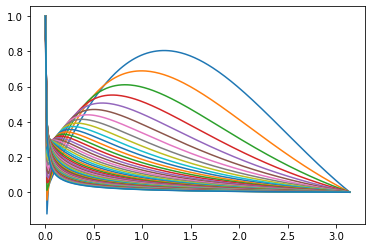

In [29]:
#Discretization
T = 5.0 # final time
num_steps = 50 # number of time steps
dt = T / num_steps # time step size

# Define mesh and function space
nx = ny = 10
mesh = IntervalMesh(200, 0, np.pi)
#mesh = UnitSquareMesh(nx, ny)

V = FunctionSpace(mesh, 'Lagrange', 1)

# Define the boundary condition
bc = [DirichletBC(V, Constant(1.0), "near(x[0], 0)"),
      DirichletBC(V, Constant(0.0), "near(x[0], pi)")]

# Define the initial condition, u(t=0, x) = sin(x)
initial_condition = Expression("sin(x[0])", degree=1)
u_k_old = interpolate(initial_condition, V)

# Define the variational problem
u = TrialFunction(V)
v = TestFunction(V)
alpha = Expression("x[0]*x[0]", degree=2)
a = u*v*dx + dt*alpha*inner(nabla_grad(u), nabla_grad(v))*dx
L = u_k_old*v*dx

# Time-stepping
u = Function(V)
t = 0
while t <= T:
    # Update time
    t += dt
    u_k_old.t = t
    # Solve variational problem at current time step
    solve(a == L, u, bc)
    # Plot solution
    plot(u)
    # Compute error at vertices
    u_e = interpolate(u_k_old, V)
    error = np.abs(u_e.vector().get_local() - u.vector().get_local()).max()
    print('time = %.2f: error = %.3g' % (t, error))
    # Update previous solution
    u_k_old.assign(u)

7. Sea el problema de valor inicial

$$\begin{cases}\frac{\partial u}{\partial t}=\nabla^2 u+f,\quad &\text{ en } \Omega\times(0,T]\\ u(x,y,t)=1 + x^2 + \alpha y^2+ \beta t, &\text{ para }(x,y)\in \partial\Omega\\ u(x,y,0)=1 + x^2 + \alpha y^2\end{cases}$$
donde $\Omega =[0,1]\times[0,1]$, $\alpha = 3,\beta = 1.2$ y $f(x,y)=\beta- 2 - 2\alpha$.

a. Encontrar la formula variacional del problema.

**R/** Note que podemos reescribir la EDP como  $\frac{\partial u}{\partial t}=\Delta u + f$. 
Defina los espacios:
$$ V = \{ v \in H^1(\Omega) : v |_{\partial \Omega} = 1 + x^2 + \alpha y^2+ \beta t, v(x,y,0)=1 + x^2 + \alpha y^2 \} $$
y
$$ \hat{V} = \{ v \in H^1_0(\Omega) : v |_{\partial \Omega} = 0 \} $$

Siguiendo el mismo procedimiento del punto 5, integrando sobre $\Omega$:
$$ \int_{\Omega} (u^k - u^{k-1}) v \,dx = dt \Big( \int_{\Omega} (\Delta u^k + f^k ) v \,dx \Big)$$
$$ \int_{\Omega} (u^k - u^{k-1}) v \,dx = dt \int_{\Omega} \Delta u^k v \,dx + dt \int_{\Omega} f^k v \,dx$$
Aplicando teorema de Green al primer termino del lado derecho obtenemos que:
$$ \int_{\Omega}  \Delta u^k v \,dx = \int_{\partial \Omega} \frac{\partial u^k}{\partial \eta} v \, dS - \int_{\Omega} \nabla u^k \nabla v \,dx $$
Como $v$ se anula en la frontera, el primer termino es 0. Entonces la formula variacional esta dada por:
$$ \int_{\Omega} (u^k - u^{k-1}) v \,dx = - dt \int_{\Omega} \nabla u^k \nabla v \,dx + dt \int_{\Omega} f^k v \,dx$$
$$ \int_{\Omega} u^k v \,dx + dt \int_{\Omega} \nabla u^k \cdot \nabla v \,dx = \int_{\Omega} u^{k-1} v \,dx + dt \int_{\Omega} f^k v \,dx $$
$$ \int_{\Omega} \Big( u^kv + dt(\nabla u^k \cdot \nabla v) \Big)\, dx =  \int_{\Omega} (u^{k-1} + dt f) v \, dx$$

b. Implementar la aproximación del problema en Fenics y resolverlo con el método de Galerkin. Graficar la solución.

Solving linear variational problem.
time = 0.10: error = 0.0564
Solving linear variational problem.
time = 0.20: error = 0.0208
Solving linear variational problem.
time = 0.30: error = 0.00708
Solving linear variational problem.
time = 0.40: error = 0.00236
Solving linear variational problem.
time = 0.50: error = 0.000783
Solving linear variational problem.
time = 0.60: error = 0.000259
Solving linear variational problem.
time = 0.70: error = 8.57e-05
Solving linear variational problem.
time = 0.80: error = 2.84e-05
Solving linear variational problem.
time = 0.90: error = 9.38e-06
Solving linear variational problem.
time = 1.00: error = 3.1e-06
Solving linear variational problem.
time = 1.10: error = 1.03e-06
Solving linear variational problem.
time = 1.20: error = 3.4e-07
Solving linear variational problem.
time = 1.30: error = 1.12e-07
Solving linear variational problem.
time = 1.40: error = 3.72e-08
Solving linear variational problem.
time = 1.50: error = 1.23e-08
Solving linear var

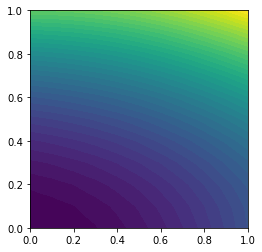

In [30]:
#Discretization
T = 5.0 # final time
num_steps = 50 # number of time steps
dt = T / num_steps # time step size

# Define mesh and function space
nx = ny = 10
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'Lagrange', 1)

# Define the boundary condition
u_D = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t', degree=2, alpha=3, beta=1.2, t=0)
def boundary(x, on_boundary):
    return on_boundary
bc = DirichletBC(V, u_D, boundary)

# Define the initial condition
initial_condition = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1]', degree=2, alpha=3)
u_k_old = interpolate(initial_condition, V)

# Define the variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression('beta - 2 - 2*alpha', degree=2, alpha=3, beta=1.2)
a = u*v*dx + dt*inner(nabla_grad(u), nabla_grad(v))*dx
L = (u_k_old + dt*f)*v*dx

# Time-stepping
u = Function(V)
t = 0
while t <= T:
    # Update time
    t += dt
    u_k_old.t = t
    # Solve variational problem at current time step
    solve(a == L, u, bc)
    # Plot solution
    plot(u)
    # Compute error at vertices
    u_e = interpolate(u_k_old, V)
    error = np.abs(u_e.vector().get_local() - u.vector().get_local()).max()
    print('time = %.2f: error = %.3g' % (t, error))
    # Update previous solution
    u_k_old.assign(u)

8. Sea el problema de valor inicial
$$\begin{cases}\frac{\partial u}{\partial t}=\nabla\cdot\Big(\alpha(u)\nabla(u) \Big) u+f,\quad &\text{ en } \Omega\times(0,T]\\ u(x,y,t)=u_D, &\text{ para }(x,y)\in \partial\Omega\\ u(x,y,0)=u_0\end{cases}$$


a. Encontrar la formula variacional del problema.

b. Escribir un pseudocódigo para resolver el problema.

9. Sea el problema de valor inicial
$$\begin{cases}\frac{\partial u}{\partial t}=\nabla\cdot\Big(\alpha(u)\nabla(u) \Big) u+f,\quad &\text{ en } \Omega\times(0,T]\\ u(x,y,t)=u_D, &\text{ para }(x,y)\in \Gamma_D\\
 \frac{\partial u}{\partial n}=u_N, &\text{ para }(x,y)\in \Gamma_N\\ u(x,y,0)=u_0\end{cases}$$


a. Encontrar la formula variacional del problema.

b. Escribir un pseudocódigo para resolver el problema.